In [ ]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 


from keras.applications.vgg16 import VGG16 
from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle



In [ ]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = r"/content/drive/MyDrive/DataBDC/data fix/Crop + rotation 20%"
os.chdir(path)

faces = []


with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.jpg'):
            faces.append(file.name)

In [ ]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

553476096/553467096 [==============================] - 5s 0us/step


In [ ]:
def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx, use_multiprocessing=True)
    return features
   
data = {}
p = r"/content/drive/MyDrive/DataBDC/data fix/PCA"


In [ ]:
for face in faces:
    try:
        feat = extract_features(face,model)
        data[face] = feat
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

In [ ]:
filenames = np.array(list(data.keys()))

feat = np.array(list(data.values()))

feat = feat.reshape(-1,4096)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataBDC/train_data_fix.csv')
df = df.drop(['folder','keterangan','detektor'],axis=1)

label = df['image path'].tolist()
unique_labels = list(set(label))

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

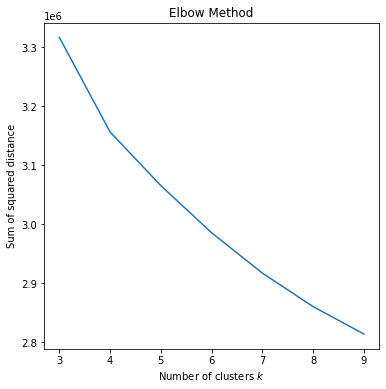

In [ ]:
sse = []
list_k = list(range(3, 10))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.title('Elbow Method')
plt.xlabel(r'Number of clusters $k$')
plt.ylabel('Sum of squared distance');

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=22)

In [ ]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    files = groups[cluster]
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        usia = df[df['image path baru'] == path+'/'+str(file)]['usia'].values[0]
        plt.title(f' Usia : {usia}')
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 714 to 30


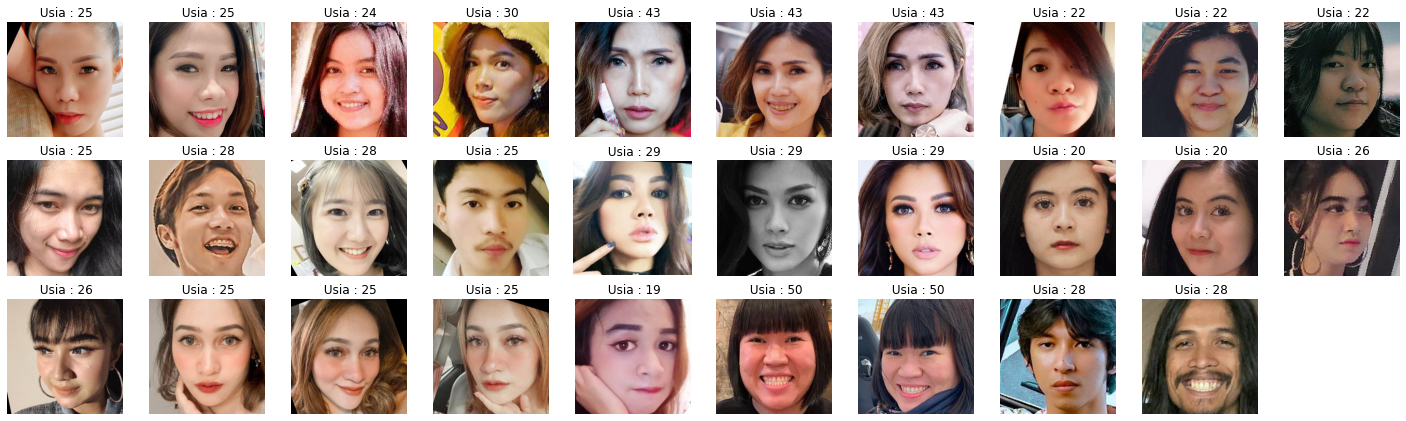

In [ ]:
view_cluster(0)

Clipping cluster size from 440 to 30


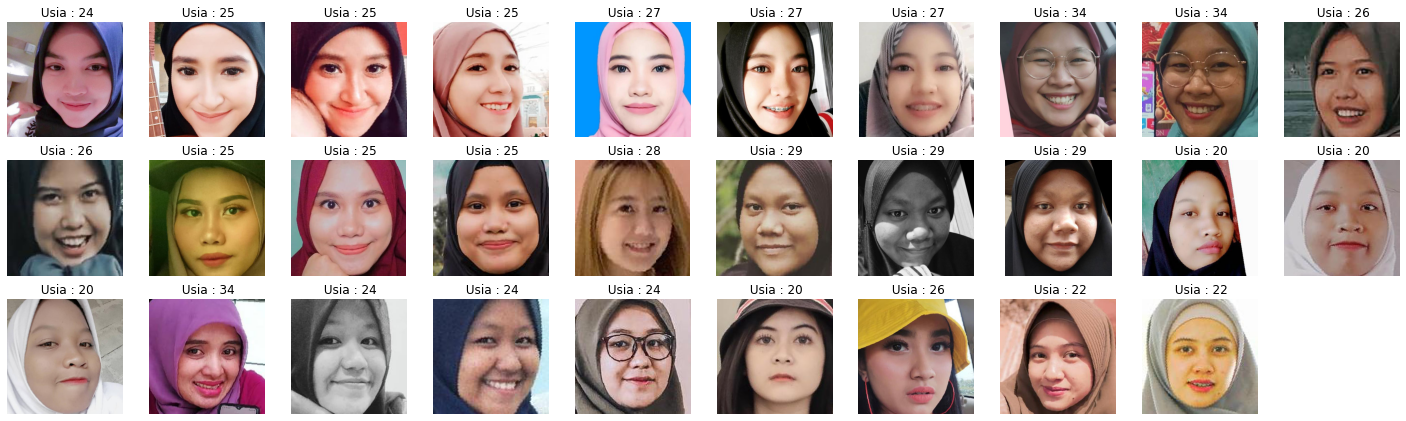

In [ ]:
view_cluster(1)

Clipping cluster size from 276 to 30


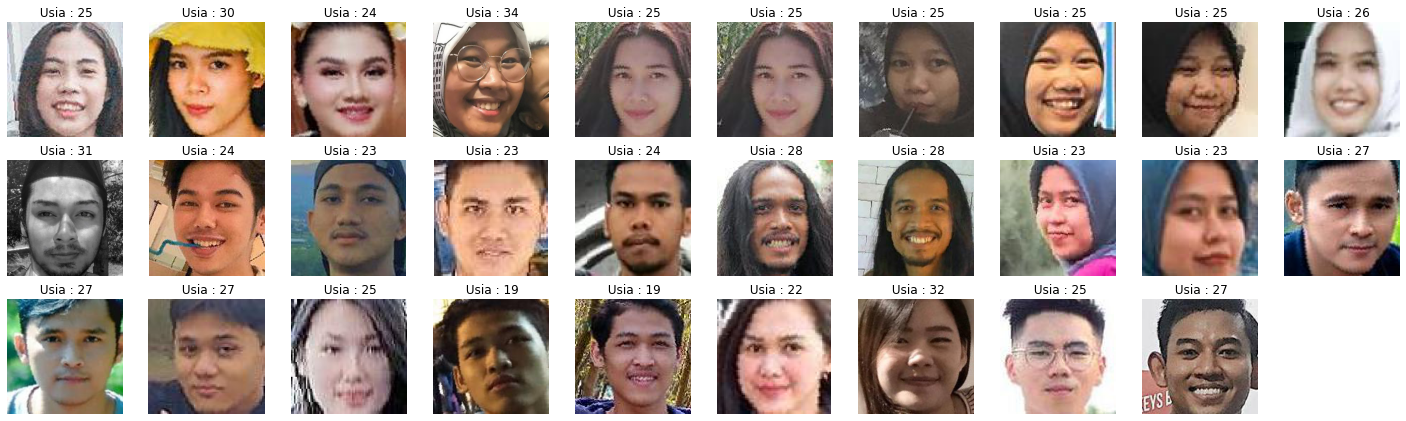

In [ ]:
view_cluster(2)

Clipping cluster size from 881 to 30


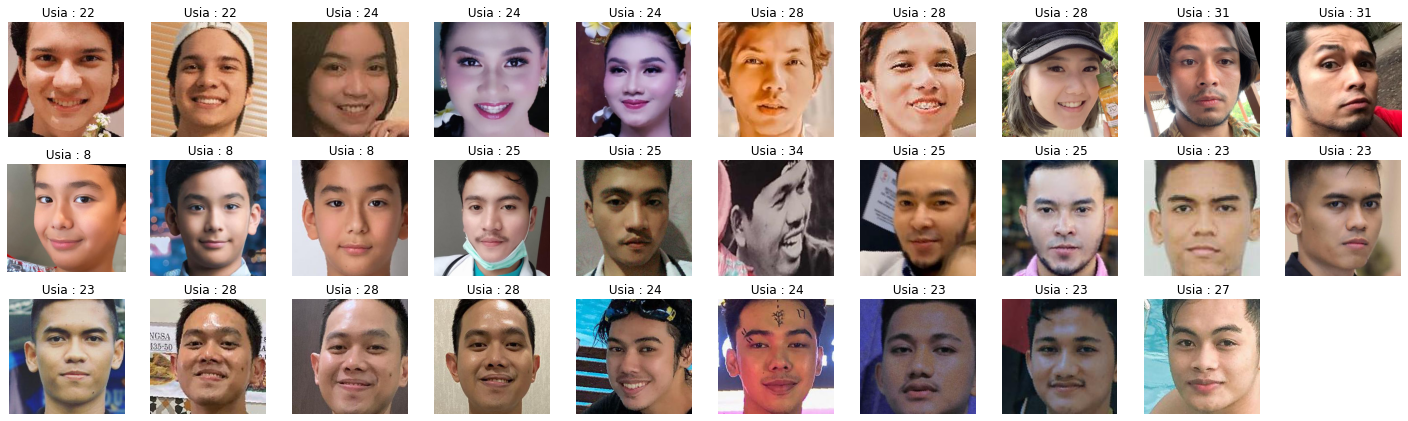

In [ ]:
view_cluster(3)